# Emission Co2 From Cars

### Importing the libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

### Importing the Dataset

In [2]:
data=pd.read_csv("Emission_Co2.csv")
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


### Exploratory Data Analysis & Visualizations

In [3]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
data.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,2,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,575,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
data.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [7]:
data.cov()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENGINESIZE,0.0,2.004759,2.377054,4.832684,3.081290,4.044338,-8.550381,78.436588
CYLINDERS,0.0,2.377054,3.230817,5.871426,3.639623,4.866710,-10.342709,96.786192
FUELCONSUMPTION_CITY,0.0,4.832684,5.871426,16.820279,11.068092,14.231585,-28.658787,233.405484
FUELCONSUMPTION_HWY,0.0,3.081290,3.639623,11.068092,7.809289,9.602253,-18.655007,152.610879
FUELCONSUMPTION_COMB,0.0,4.044338,4.866710,14.231585,9.602253,12.149371,-24.157594,197.062444
FUELCONSUMPTION_COMB_MPG,0.0,-8.550381,-10.342709,-28.658787,-18.655007,-24.157594,55.781509,-429.004416
CO2EMISSIONS,0.0,78.436588,96.786192,233.405484,152.610879,197.062444,-429.004416,4016.048970


In [8]:
data.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [9]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
data.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [11]:
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [12]:
data['MAKE'].unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [13]:
data['MODEL'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', 'RDX AWD', 'RLX', 'TL', 'TL AWD',
       'TSX', 'DB9', 'RAPIDE', 'V8 VANTAGE', 'V8 VANTAGE S', 'VANQUISH',
       'A4', 'A4 QUATTRO', 'A5 CABRIOLET QUATTRO', 'A5 QUATTRO',
       'A6 QUATTRO', 'A6 QUATTRO TDI CLEAN DIESEL', 'A7 QUATTRO',
       'A7 QUATTRO TDI CLEAN DIESEL', 'A8', 'A8 TDI CLEAN DIESEL', 'A8L',
       'A8L TDI CLEAN DIESEL', 'ALLROAD QUATTRO', 'Q5', 'Q5 HYBRID',
       'Q5 TDI CLEAN DIESEL', 'Q7', 'Q7 TDI CLEAN DIESEL', 'R8',
       'R8 SPYDER', 'RS5', 'RS5 CABRIOLET', 'RS7', 'S4', 'S5',
       'S5 CABRIOLET', 'S6', 'S7', 'S8', 'SQ5', 'TT COUPE QUATTRO',
       'TT ROADSTER QUATTRO', 'TTS COUPE QUATTRO', 'TTS ROADSTER QUATTRO',
       'CONTINENTAL GT', 'CONTINENTAL GT CONVERTIBLE',
       'CONTINENTAL GT SPEED CONVERTIBLE', 'CONTINENTAL GTC',
       'FLYING SPUR', 'MULSANNE', '320i', '320i xDRIVE', '328d xDRIVE',
       '328d xDRIVE TOURING', '328i', '328i xDRIVE',
       '328i xDRIVE GRAN TURISMO', '328i xDRIVE TOURING', '335i',
 

In [14]:
data['VEHICLECLASS'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [15]:
data['FUELTYPE'].unique()

array(['Z', 'X'], dtype=object)

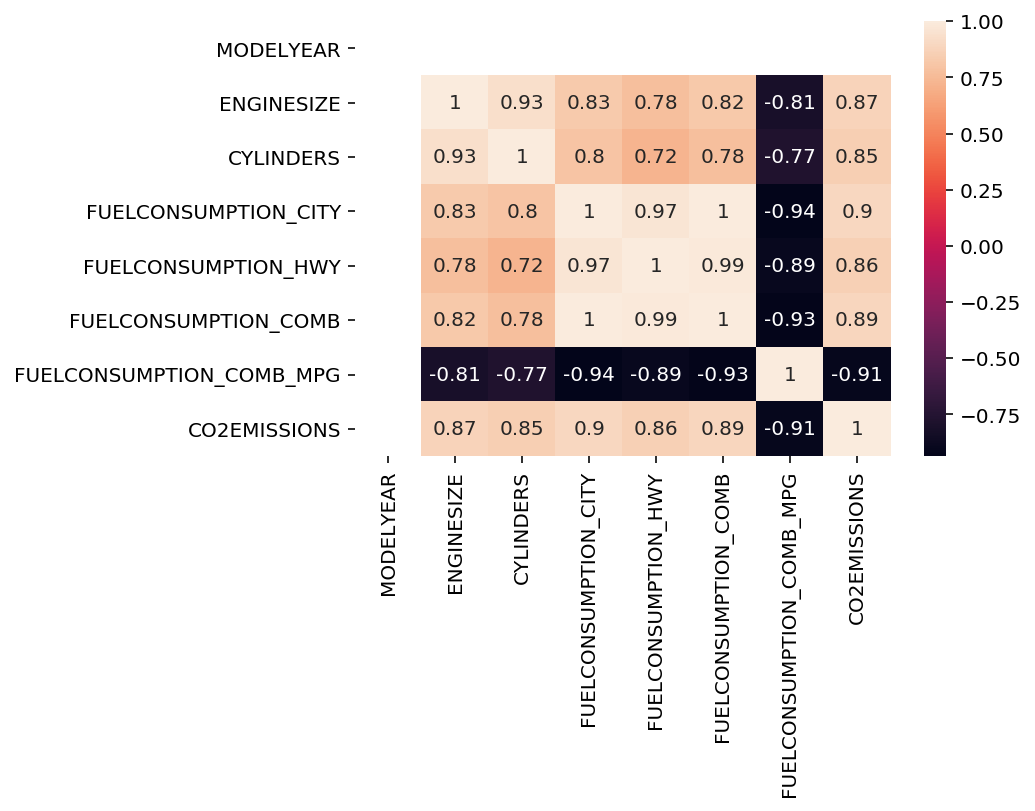

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

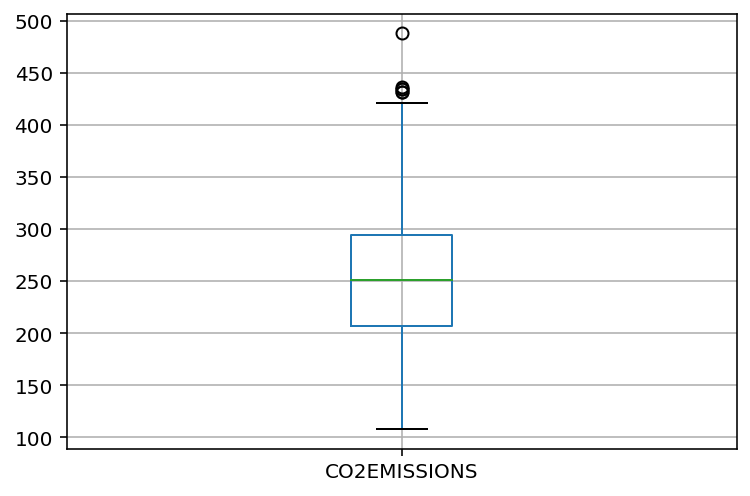

In [17]:
data.boxplot(column='CO2EMISSIONS')

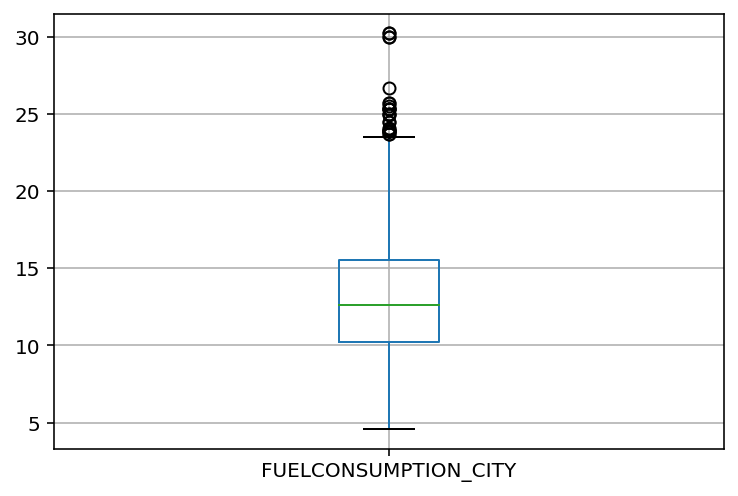

In [18]:
data.boxplot(column='FUELCONSUMPTION_CITY')

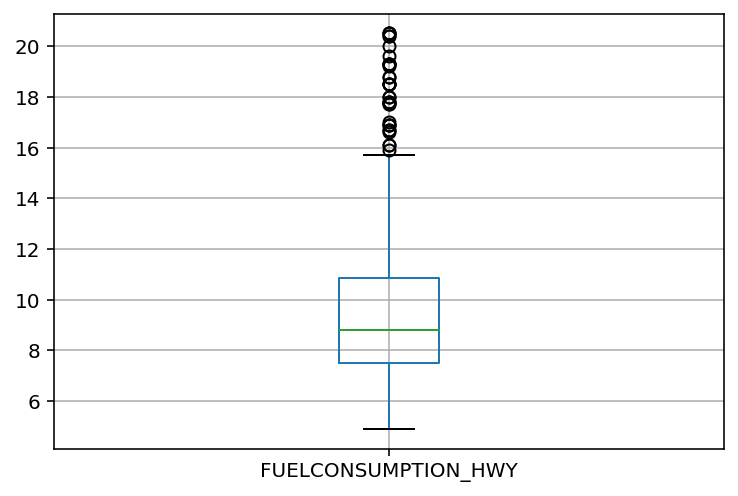

In [19]:
data.boxplot(column='FUELCONSUMPTION_HWY')

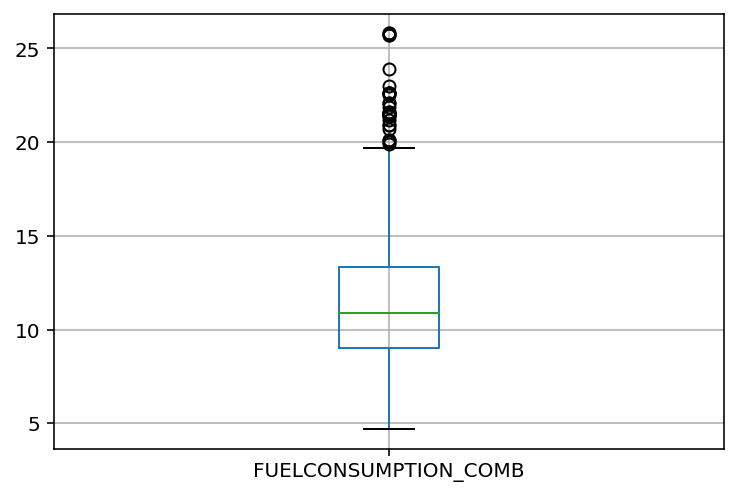

In [20]:
data.boxplot(column='FUELCONSUMPTION_COMB')

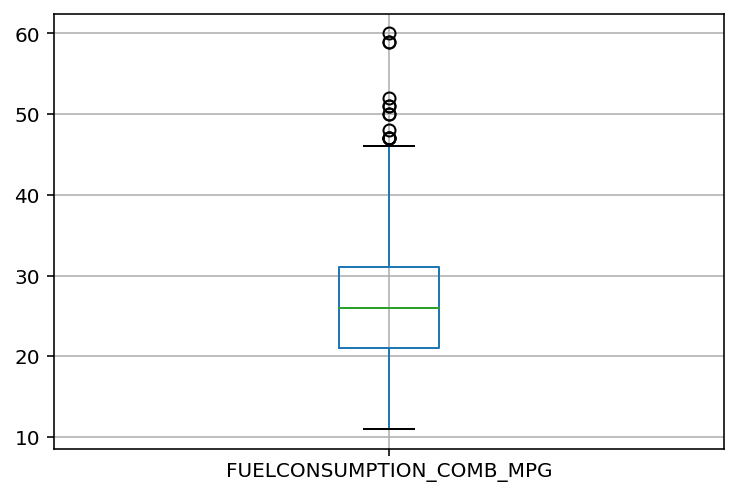

In [21]:
data.boxplot(column='FUELCONSUMPTION_COMB_MPG')

In [22]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [23]:
data[['MODEL','CO2EMISSIONS']].iplot()

In [24]:
data[['FUELCONSUMPTION_CITY','CO2EMISSIONS']].iplot(kind='surface',colorscale='blues')

In [25]:
data[['MODEL', 'CO2EMISSIONS']].iplot(
    kind='hist',
    histnorm='percent',
    barmode='overlay',
    xTitle='Description',
    yTitle='Value',
    title='CO2EMISSIONS by MODEL')

### Taking Care of Missing Data

In [26]:
data.apply(lambda x: sum(x.isnull()),axis=0)

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

from the above output, we can concluded that there are no none values

### Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lb2=LabelEncoder()
data['MAKE']=lb.fit_transform(data['MAKE'])
data['MODEL']=lb.fit_transform(data['MODEL'])
data['VEHICLECLASS']=lb.fit_transform(data['VEHICLECLASS'])
data['FUELTYPE']=lb.fit_transform(data['FUELTYPE'])
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,0,329,0,2.0,4,AS5,1,9.9,6.7,8.5,33,196
1,2014,0,329,0,2.4,4,M6,1,11.2,7.7,9.6,29,221
2,2014,0,330,0,1.5,4,AV7,1,6.0,5.8,5.9,48,136
3,2014,0,389,11,3.5,6,AS6,1,12.7,9.1,11.1,25,255
4,2014,0,483,11,3.5,6,AS6,1,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,38,624,11,3.0,6,AS6,0,13.4,9.8,11.8,24,271
1063,2014,38,624,11,3.2,6,AS6,0,13.2,9.5,11.5,25,264
1064,2014,38,625,11,3.0,6,AS6,0,13.4,9.8,11.8,24,271
1065,2014,38,625,11,3.2,6,AS6,0,12.9,9.3,11.3,25,260


### One Hot Encoding

In [28]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()

In [29]:
ohe=OneHotEncoder(sparse=False)
ohe.fit_transform(data)

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [30]:
ohe.categories_

[array([2014], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 1

In [31]:
x=oh.fit_transform(data).toarray()  
z=oh.fit_transform(x[:,1:2]).toarray()
x=np.delete(x,0,axis=1)          
x=np.concatenate((z,x),axis=1)

In [32]:
data1 = data[['FUELTYPE','ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
data1.head()

,FUELTYPE,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,1,2.0,4,9.9,6.7,8.5,33,196
1,1,2.4,4,11.2,7.7,9.6,29,221
2,1,1.5,4,6.0,5.8,5.9,48,136
3,1,3.5,6,12.7,9.1,11.1,25,255
4,1,3.5,6,12.1,8.7,10.6,27,244


In [33]:
y = data1['FUELTYPE']
x= data1.drop('FUELTYPE', axis = 1)

In [34]:
x

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [35]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1062    0
1063    0
1064    0
1065    0
1066    0
Name: FUELTYPE, Length: 1067, dtype: int32

### Feature Scaling

In [36]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.13513514, 0.11111111, 0.20703125, ..., 0.18009479, 0.44897959,
        0.23157895],
       [0.18918919, 0.11111111, 0.2578125 , ..., 0.23222749, 0.36734694,
        0.29736842],
       [0.06756757, 0.11111111, 0.0546875 , ..., 0.05687204, 0.75510204,
        0.07368421],
       ...,
       [0.27027027, 0.33333333, 0.34375   , ..., 0.33649289, 0.26530612,
        0.42894737],
       [0.2972973 , 0.33333333, 0.32421875, ..., 0.31279621, 0.28571429,
        0.4       ],
       [0.2972973 , 0.33333333, 0.40234375, ..., 0.38388626, 0.2244898 ,
        0.48947368]])

### Splitting Data into Train and Test

In [37]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [38]:
X_train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
152,2.4,4,9.6,6.5,8.2,34,189
741,3.5,6,11.6,8.1,10.0,28,230
169,3.0,6,12.7,8.9,11.0,26,253
574,3.2,6,12.5,9.1,11.0,26,253
897,2.7,6,10.7,7.4,9.2,31,212
...,...,...,...,...,...,...,...
1050,3.6,6,14.2,9.5,12.1,23,278
545,5.0,8,16.6,11.9,14.5,19,334
904,3.0,6,13.7,8.9,11.5,25,264
80,2.0,4,7.6,5.5,6.7,42,181


In [39]:
X_test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
188,3.6,6,13.2,8.7,11.2,25,258
901,3.6,6,12.9,8.4,10.9,26,251
1010,2.7,4,11.6,8.5,10.2,28,235
464,3.6,6,13.9,9.6,12.0,24,276
942,2.0,4,9.6,7.1,8.5,33,196
...,...,...,...,...,...,...,...
205,3.6,6,13.9,9.6,12.0,24,276
600,3.3,6,12.7,8.8,10.9,26,251
385,3.7,6,15.0,11.4,13.4,21,308
585,3.0,6,11.2,8.4,9.9,29,267


In [40]:
y_train

152     0
741     1
169     0
574     0
897     1
       ..
1050    0
545     1
904     1
80      0
309     0
Name: FUELTYPE, Length: 746, dtype: int32

In [41]:
y_test

188     0
901     1
1010    0
464     0
942     1
       ..
205     0
600     0
385     0
585     1
216     0
Name: FUELTYPE, Length: 321, dtype: int32

In [42]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
x_train_std = minmax.fit_transform(X_train)
x_test_std = minmax.transform(X_test)

In [43]:
x_train_std

array([[0.18918919, 0.11111111, 0.19215686, ..., 0.16190476, 0.47916667,
        0.24159021],
       [0.33783784, 0.33333333, 0.27058824, ..., 0.24761905, 0.35416667,
        0.36697248],
       [0.27027027, 0.33333333, 0.31372549, ..., 0.2952381 , 0.3125    ,
        0.43730887],
       ...,
       [0.27027027, 0.33333333, 0.35294118, ..., 0.31904762, 0.29166667,
        0.47094801],
       [0.13513514, 0.11111111, 0.11372549, ..., 0.09047619, 0.64583333,
        0.21712538],
       [0.35135135, 0.33333333, 0.33333333, ..., 0.3047619 , 0.29166667,
        0.45259939]])

In [44]:
x_test_std

array([[0.35135135, 0.33333333, 0.33333333, ..., 0.3047619 , 0.29166667,
        0.45259939],
       [0.35135135, 0.33333333, 0.32156863, ..., 0.29047619, 0.3125    ,
        0.43119266],
       [0.22972973, 0.11111111, 0.27058824, ..., 0.25714286, 0.35416667,
        0.382263  ],
       ...,
       [0.36486486, 0.33333333, 0.40392157, ..., 0.40952381, 0.20833333,
        0.60550459],
       [0.27027027, 0.33333333, 0.25490196, ..., 0.24285714, 0.375     ,
        0.48012232],
       [0.58108108, 0.55555556, 0.75294118, ..., 0.7952381 , 0.04166667,
        0.71559633]])

## Evaluation 

# Random Forest Regression

In [45]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3, random_state=0)
rmf_clf = rmf.fit(X_train, y_train)


#Print cross validation score for Random Forest Calssifier
rmf_clf_acc = cross_val_score(rmf_clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=2)
rmf_proba = cross_val_predict(rmf_clf, x_train_std, y_train, cv=3, method='predict_proba')
rmf_clf_scores = rmf_proba[:,-1]

In [46]:
rmf_clf_acc

array([0.69477912, 0.65863454, 0.65322581])

In [47]:
y_pred=rmf.predict(X_test)

In [48]:
print(y_test.values)

[0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0
 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1
 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1
 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0
 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0
 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0]


In [49]:
print(y_pred)

[0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0
 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1]


In [50]:
y_pred1=rmf.predict(X_train)

In [51]:
print(y_train.values)

[0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1
 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1
 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0
 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1
 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1
 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0
 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0
 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1
 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0
 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1
 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0
 0 1 0 0 1 1 0 1 1 1 0 1 

In [52]:
print(y_pred1)

[0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1
 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0
 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 

In [53]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("\nTest Accuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("\nTrain Accuracy score: %f" %(accuracy_score(y_train,y_pred1) * 100))


Test Accuracy score: 66.355140

Train Accuracy score: 76.273458


In [54]:
print("Test Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("Train Recall score : %f" %(recall_score(y_train, y_pred1) * 100))
print("Test ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print("Train ROC score : %f\n" %(roc_auc_score(y_train, y_pred1) * 100))
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_train, y_pred1))

Test Recall score : 54.109589
Train Recall score : 66.763006
Test ROC score : 65.340509

Train ROC score : 75.631503

[[134  41]
 [ 67  79]]
[[338  62]
 [115 231]]


In [55]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =rmf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

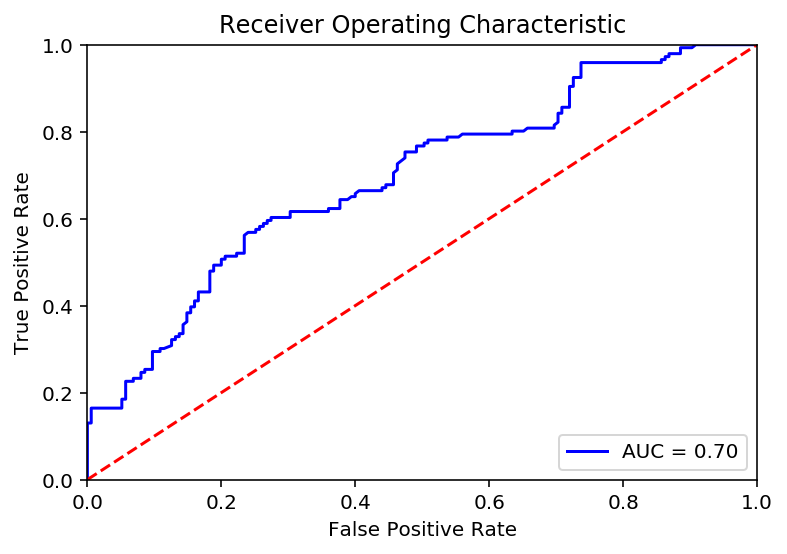

In [56]:
# PLOT ROC curve "Receiver Operating Characteristics"
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
probs =rmf.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

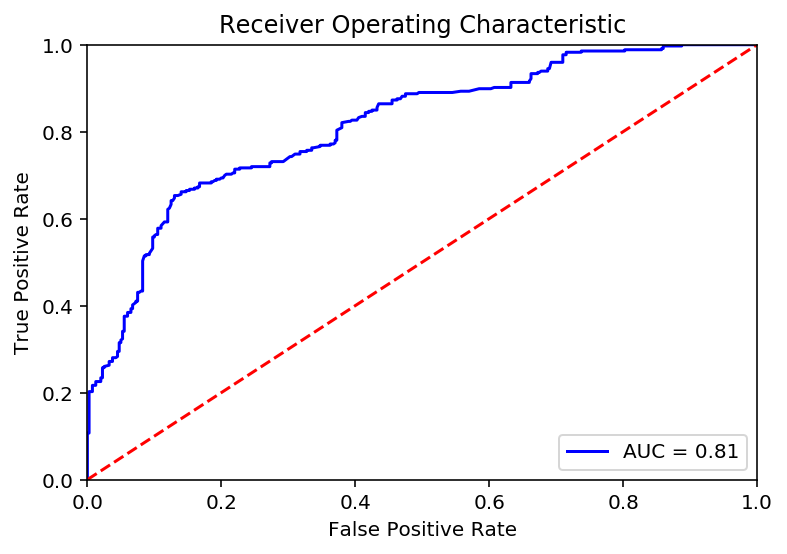

In [58]:
# PLOT ROC curve "Receiver Operating Characteristics"
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [59]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
def ROC_curve(title, y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (Random Forest Classifier): 0.74 


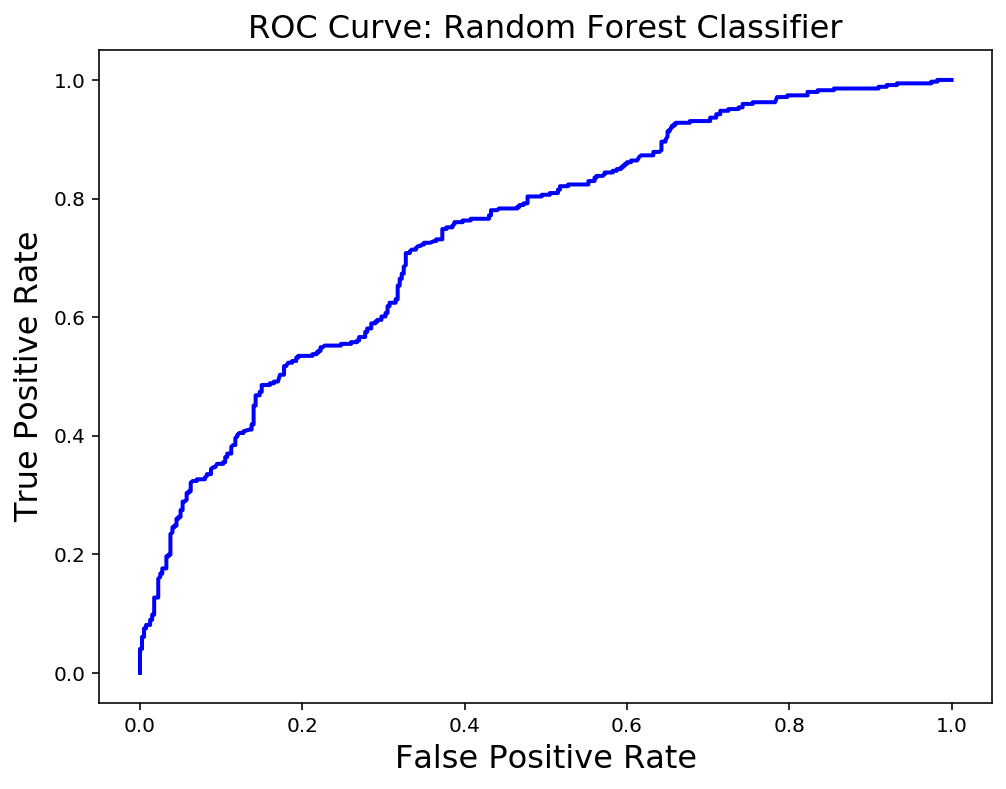

In [60]:
ROC_curve('Random Forest Classifier',y_train,rmf_clf_scores)

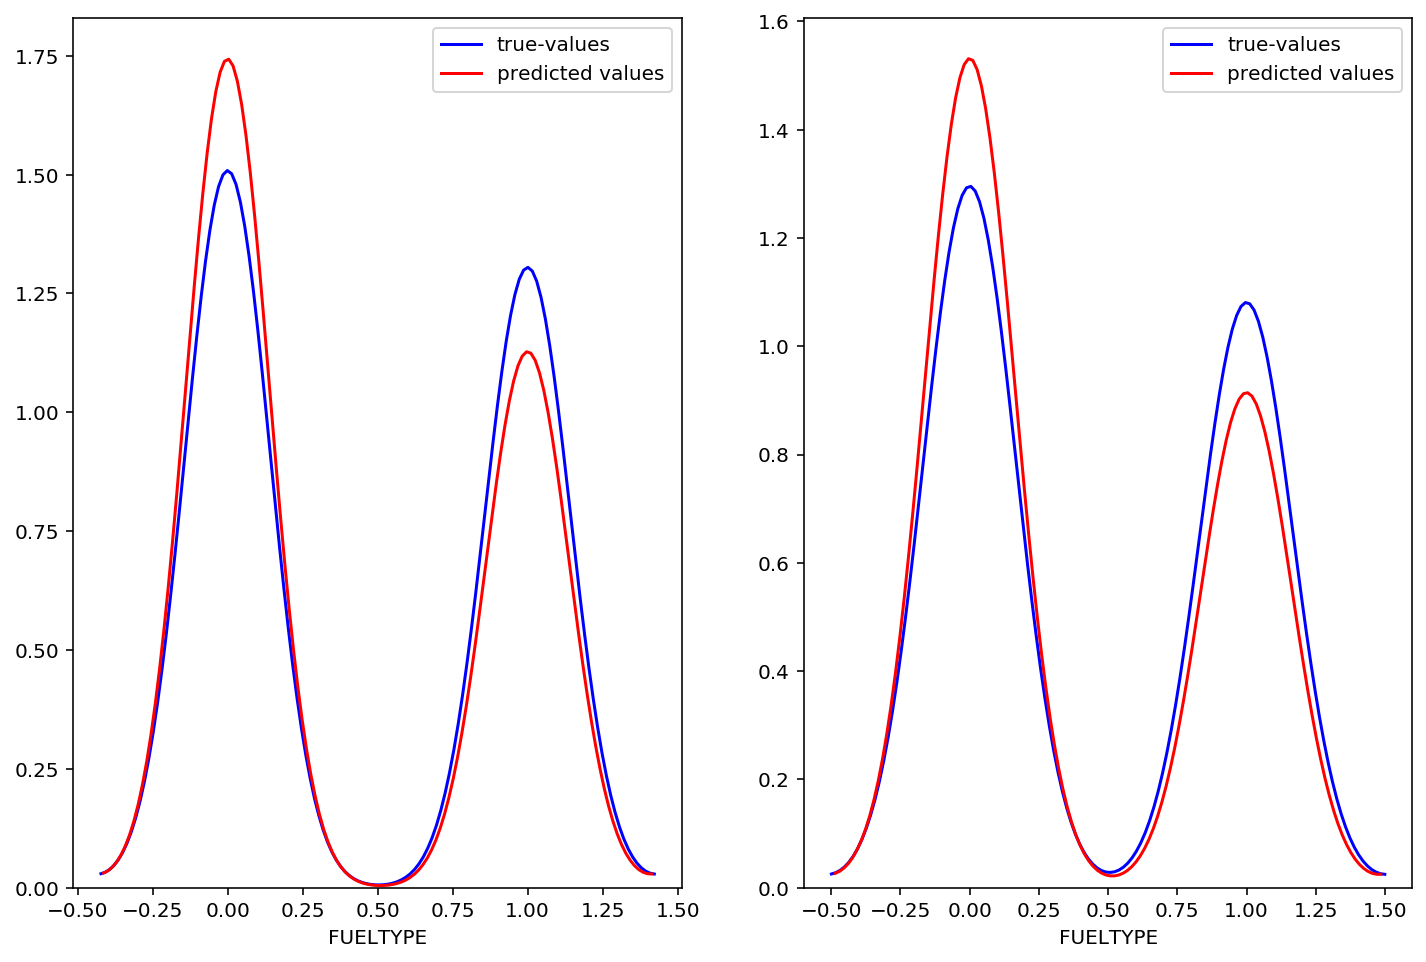

In [61]:
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
sns.distplot(y_train, color = 'b', label="true-values", hist=False, ax = ax1)
sns.distplot(y_pred1, color='r', label="predicted values", hist= False , ax = ax1)

sns.distplot(y_test, color = 'b', label="true-values", hist=False, ax= ax2)
sns.distplot(y_pred, color='r', label="predicted values", hist= False , ax = ax2)
plt.show()

# Cross Validation method

Now we will use the __cross_calidation_score__ and __cross_validation_predict__ to evaluate the accuracy and predict respectively using the cross validation approach. 

In [62]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

score_cv = cross_val_score(rmf,X_train, y_train, cv = 2)
print("Mean Accuracy of training data using 2 folds :",score_cv.mean())

Mean Accuracy of training data using 2 folds : 0.693029490616622


In [63]:
score_cv = cross_val_score(rmf,X_test, y_test, cv = 2)
print("Mean Accuracy of test data using 2 folds :",score_cv.mean())

Mean Accuracy of test data using 2 folds : 0.6480395962732919


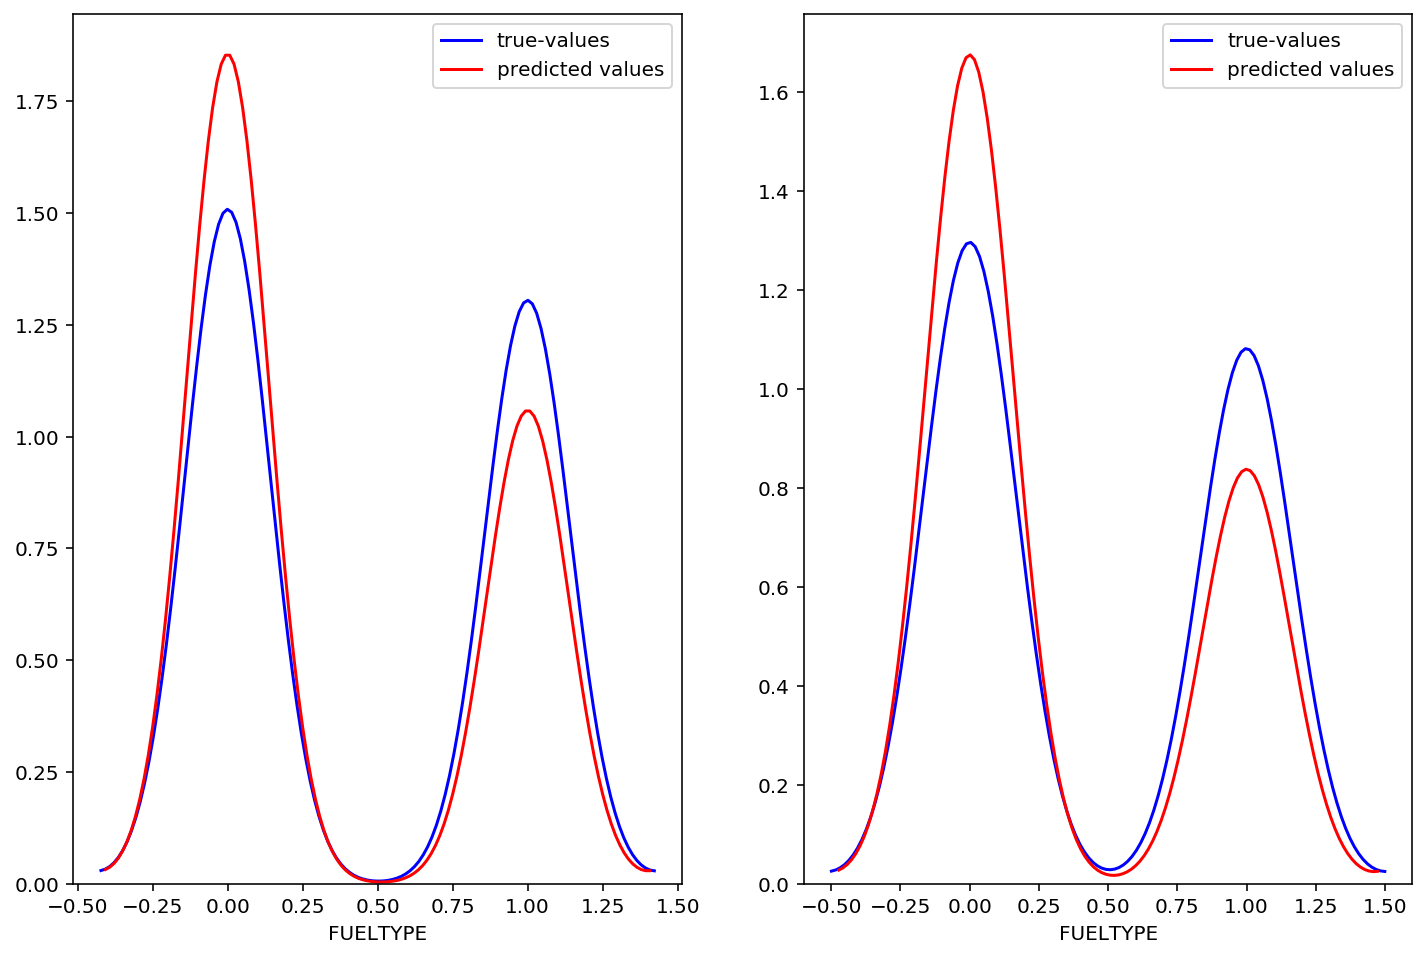

In [64]:
ytest_cv = cross_val_predict(rmf,X_test,y_test,cv= 2)
ytrain_cv = cross_val_predict(rmf,X_train,y_train,cv =2)

fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
sns.distplot(y_train, color = 'b', label="true-values", hist=False, ax = ax1)
sns.distplot(ytrain_cv, color='r', label="predicted values", hist= False , ax = ax1)

sns.distplot(y_test, color = 'b', label="true-values", hist=False, ax= ax2)
sns.distplot(ytest_cv, color='r', label="predicted values", hist= False , ax = ax2)
plt.show()

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Ip=[('scale',StandardScaler()),('model',RandomForestClassifier())]

In [66]:
pipe=Pipeline(Ip)
pipe.fit(X_train,y_train)
yhat_p = pipe.predict(X_test)
yhat_p[:5]

array([0, 0, 0, 0, 0])

In [67]:
from sklearn.metrics import r2_score
print(r2_score(yhat_p,y_test))

0.14123849240695552


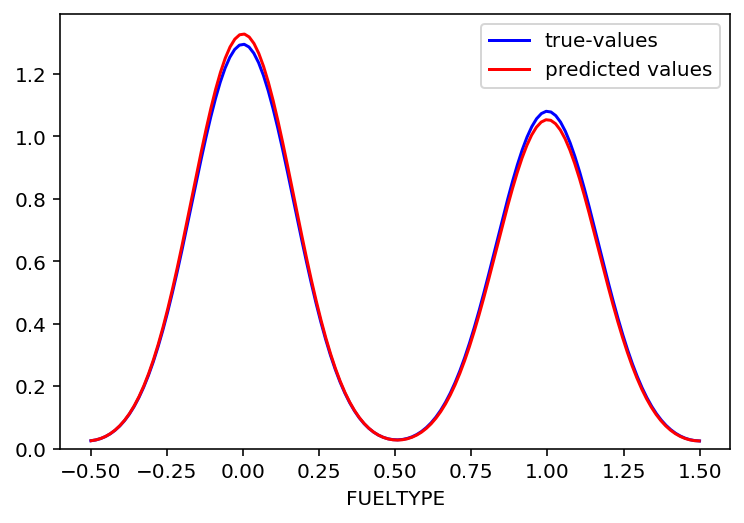

In [69]:
ax = sns.distplot(y_test, color = 'b', label="true-values", hist=False)
sns.distplot(yhat_p, color='r', label="predicted values", hist= False , ax = ax)
plt.show()